# Cette petite modification peut considérablement améliorer la durée d'exécution de KMeans

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 300
colors = ['red', 'green', 'blue', 'orange']
c_list = ['#46C7C7', '#00B9FF', '#FF7051']

In [2]:
# Générer des données 2D

X = np.vstack([
    np.random.randn(100, 2) + np.array([4, 4]),
    np.random.randn(100, 2) + np.array([-4, 4]),
    np.random.randn(100, 2) + np.array([4, -4]),
    np.random.randn(100, 2) + np.array([-4, -4])
])

## KMeans

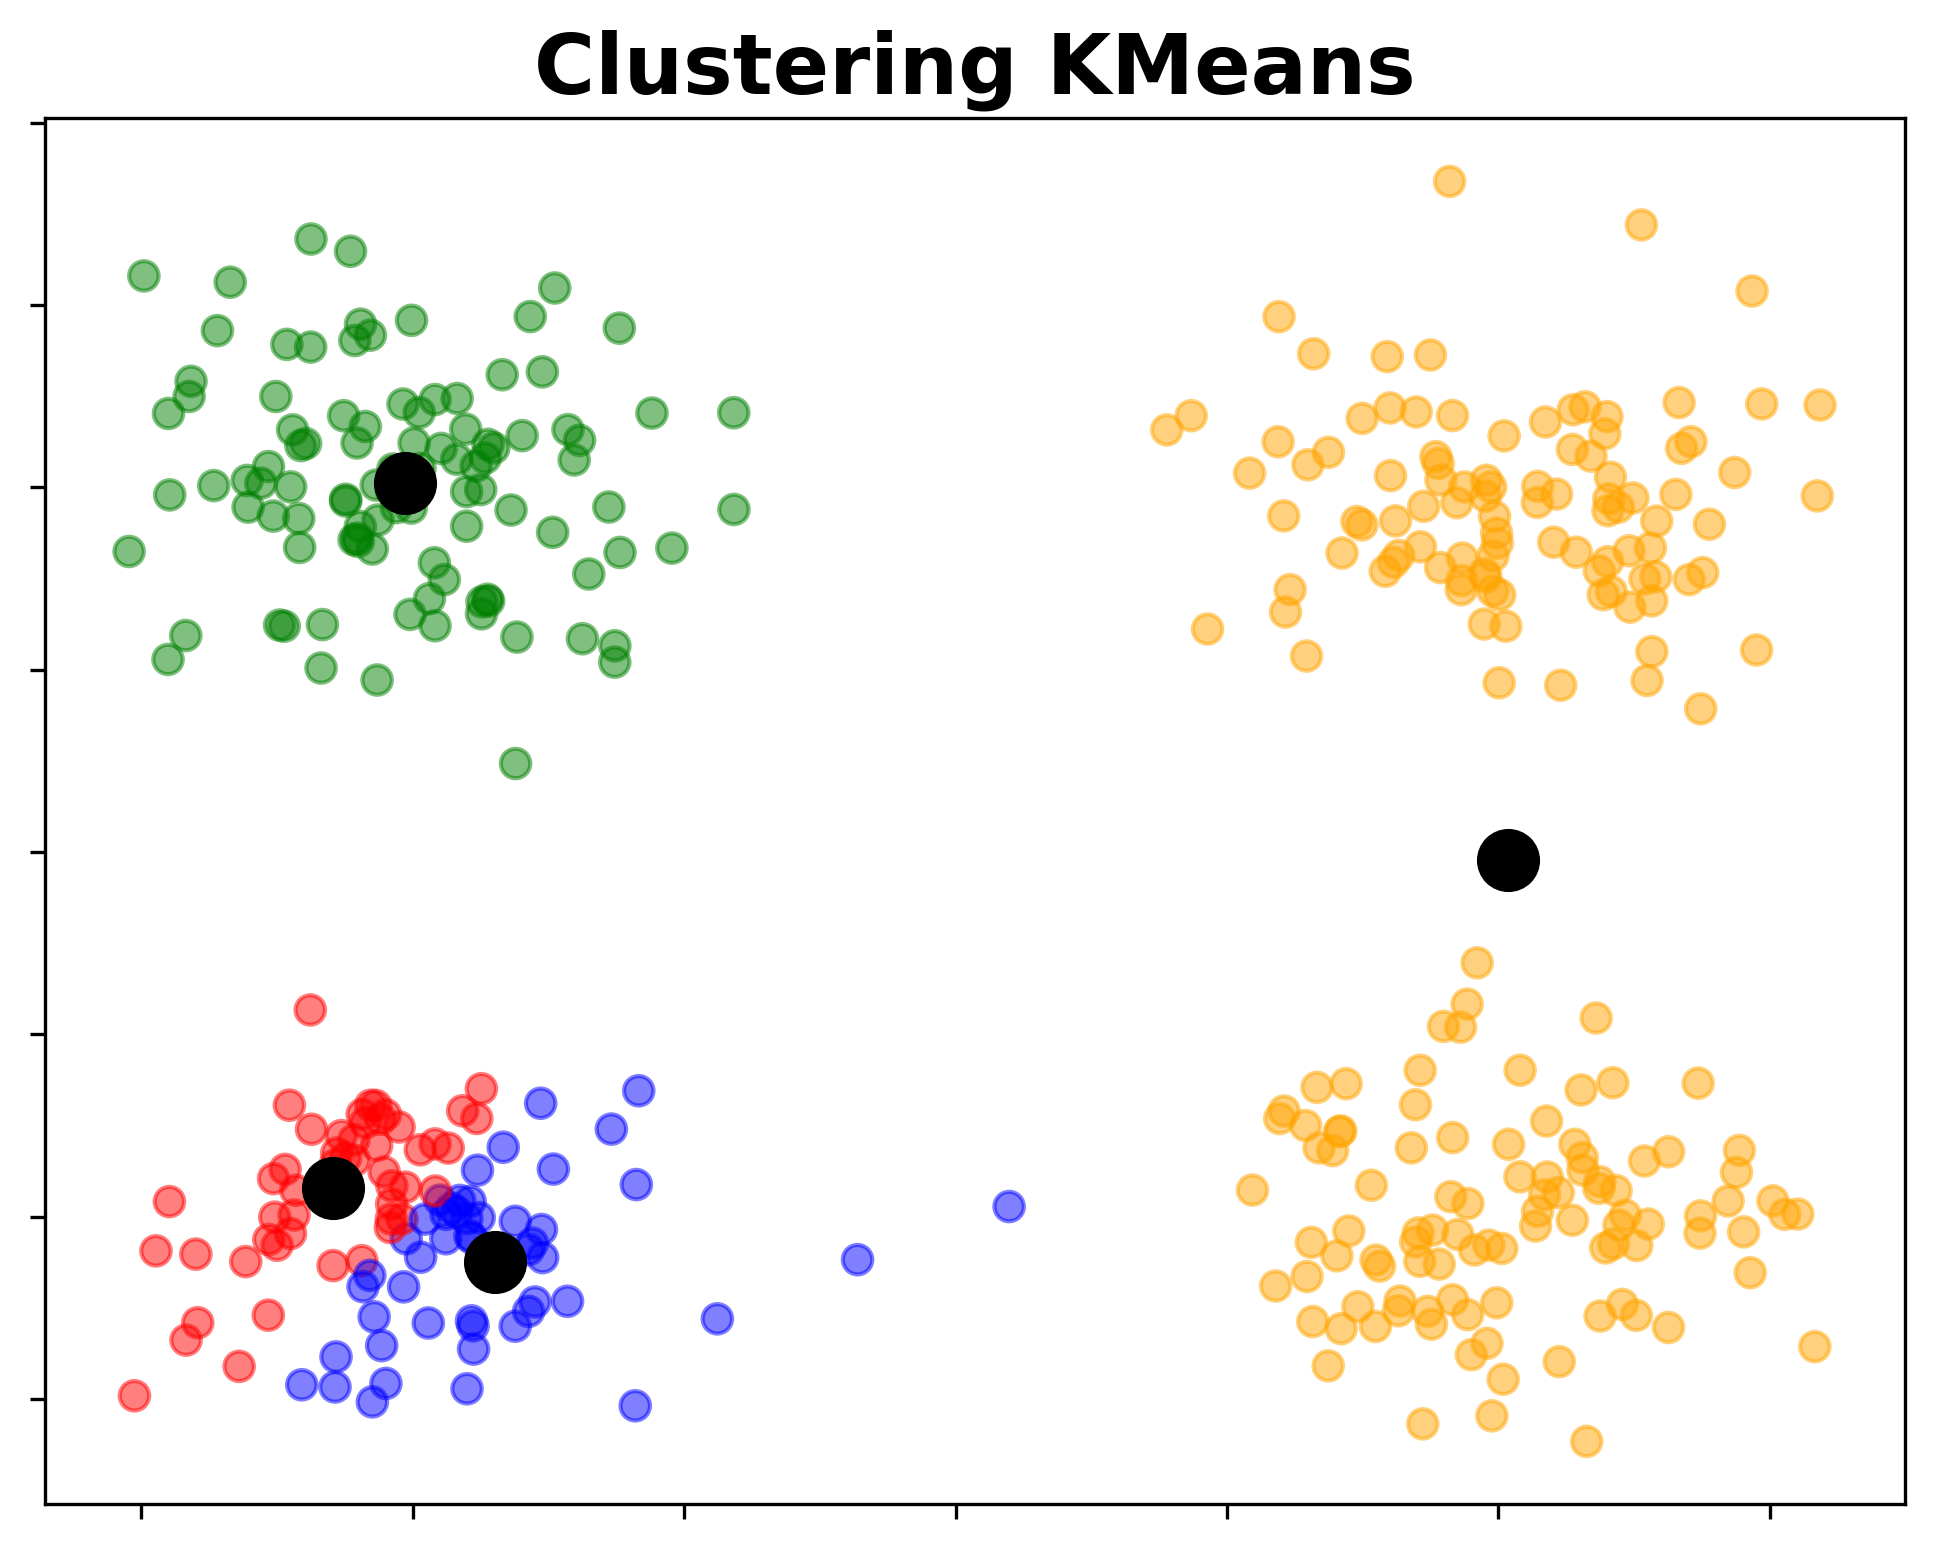

In [3]:
def kmeans_init(X, K):
    centroids = X[np.random.choice(range(X.shape[0]), size=K, replace=False)]
    return centroids

def kmeans(X, K, max_iters=10):
    centroids = kmeans_init(X, K)
    for i in range(max_iters):
        # affecter chaque point au centroïde le plus proche
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        cluster_ids = np.argmin(distances, axis=1)
        # mettre à jour les centroïdes pour qu'ils correspondent à la moyenne des points qui leur sont attribués
        for k in range(K):
            centroids[k] = np.mean(X[cluster_ids == k], axis=0)
    return cluster_ids, centroids


# exécuter l'algorithme k-means
cluster_ids, centroids = kmeans(X, K=4)

# tracer les données avec une couleur différente par cluster final
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in cluster_ids], s=50, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200)
ax.set_title('Clustering KMeans', fontsize = 20, fontweight="bold")

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

## KMeans++

In [4]:
def kmeans_init(X, K):
    centroids = np.zeros((K, X.shape[1]))
    centroids[0] = X[np.random.choice(range(X.shape[0]))]
    for k in range(1, K):
        D = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            distances = np.linalg.norm(x - centroids[:k], axis=1)
            D[i] = np.min(distances)**2
        
        centroids[k] = X[np.argmax(D)]

    return centroids

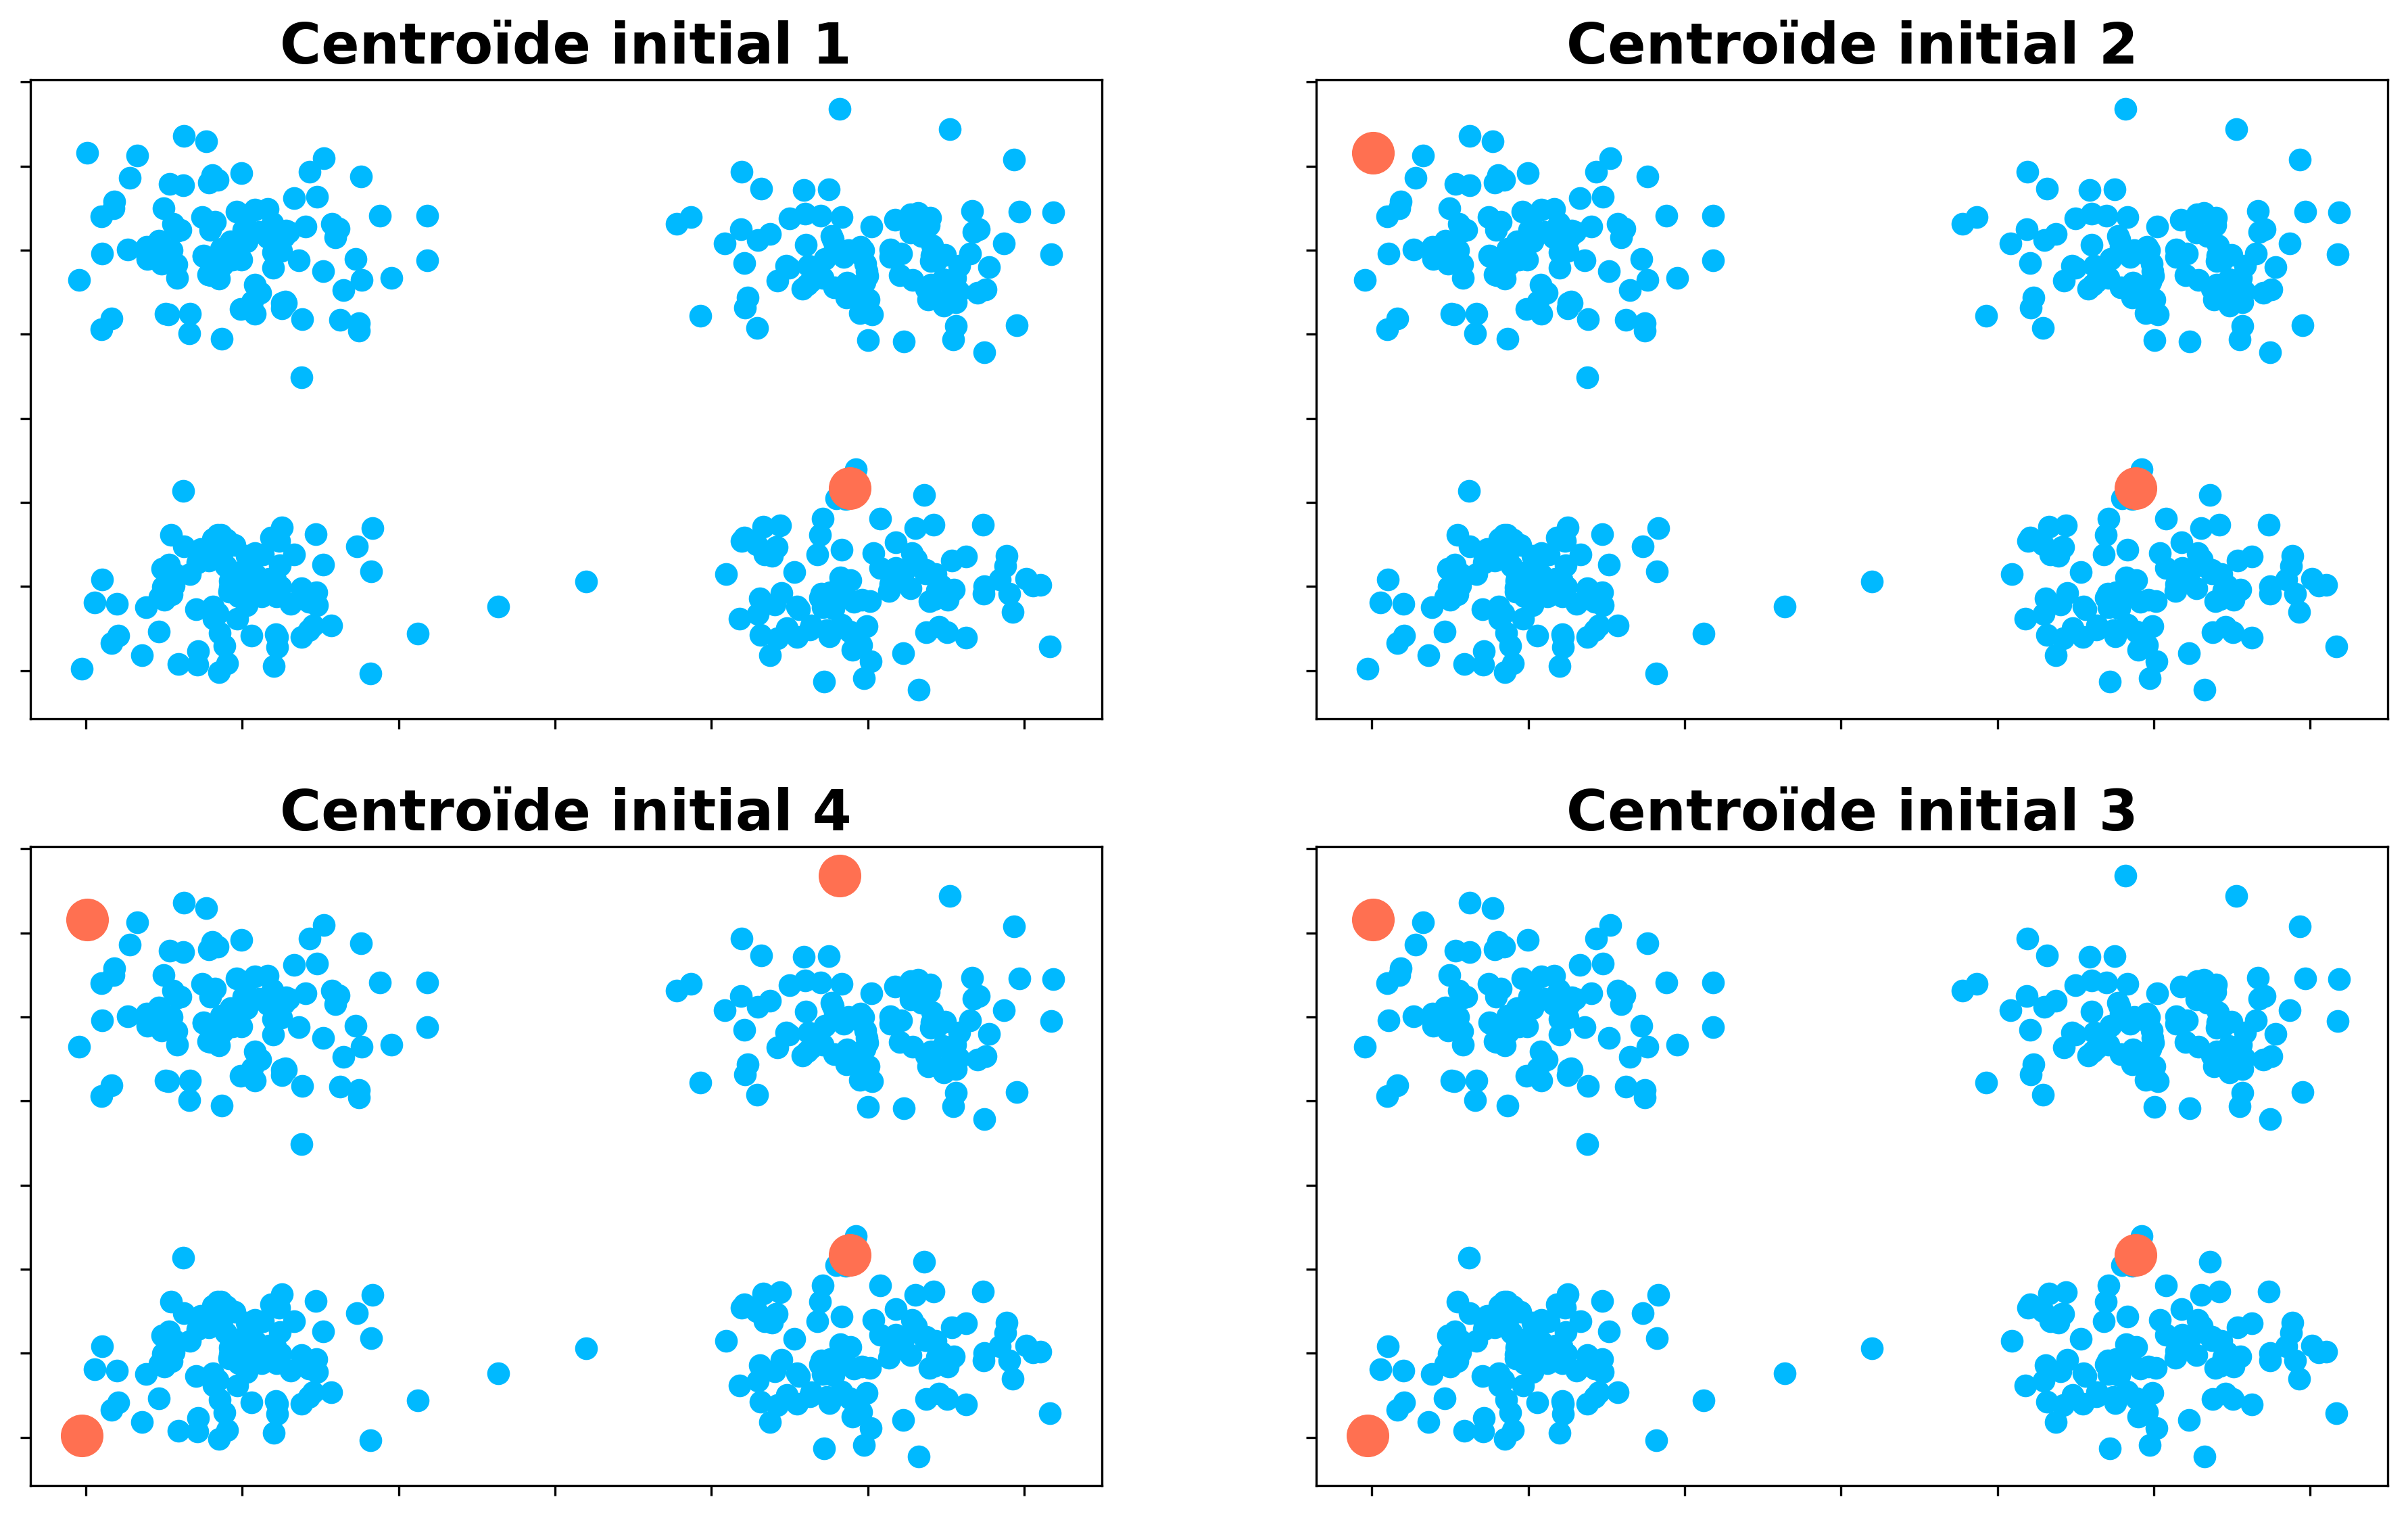

In [5]:
# tracer les données et les centroïdes initiaux dans une grille 2x2
centroids = kmeans_init(X, K=4)
fig, axs = plt.subplots(2, 2, figsize=(15, 9))
scatter_color_idx = 1
centroid_color_idx = 2

axs[0, 0].scatter(X[:, 0], X[:, 1], s=50, c = c_list[scatter_color_idx])
axs[0, 0].scatter(centroids[:1, 0], centroids[:1, 1], c=c_list[centroid_color_idx], s=200)
axs[0, 0].set_title("Centroïde initial 1", fontsize = 20, fontweight="bold")
axs[0, 0].set_xticklabels([])
axs[0, 0].set_yticklabels([])

axs[0, 1].scatter(X[:, 0], X[:, 1], s=50, c = c_list[scatter_color_idx])
axs[0, 1].scatter(centroids[:2, 0], centroids[:2, 1], c=c_list[centroid_color_idx], s=200)
axs[0, 1].set_title("Centroïde initial 2", fontsize = 20, fontweight="bold")
axs[0, 1].set_xticklabels([])
axs[0, 1].set_yticklabels([])

axs[1, 0].scatter(X[:, 0], X[:, 1], s=50, c = c_list[scatter_color_idx])
axs[1, 0].scatter(centroids[:4, 0], centroids[:4, 1], c=c_list[centroid_color_idx], s=200)
axs[1, 0].set_title("Centroïde initial 4", fontsize = 20, fontweight="bold")
axs[1, 0].set_xticklabels([])
axs[1, 0].set_yticklabels([])

axs[1, 1].scatter(X[:, 0], X[:, 1], s=50, c = c_list[scatter_color_idx])
axs[1, 1].scatter(centroids[:3, 0], centroids[:3, 1], c=c_list[centroid_color_idx], s=200)
axs[1, 1].set_title("Centroïde initial 3", fontsize = 20, fontweight="bold")
axs[1, 1].set_xticklabels([])
axs[1, 1].set_yticklabels([])

plt.show()

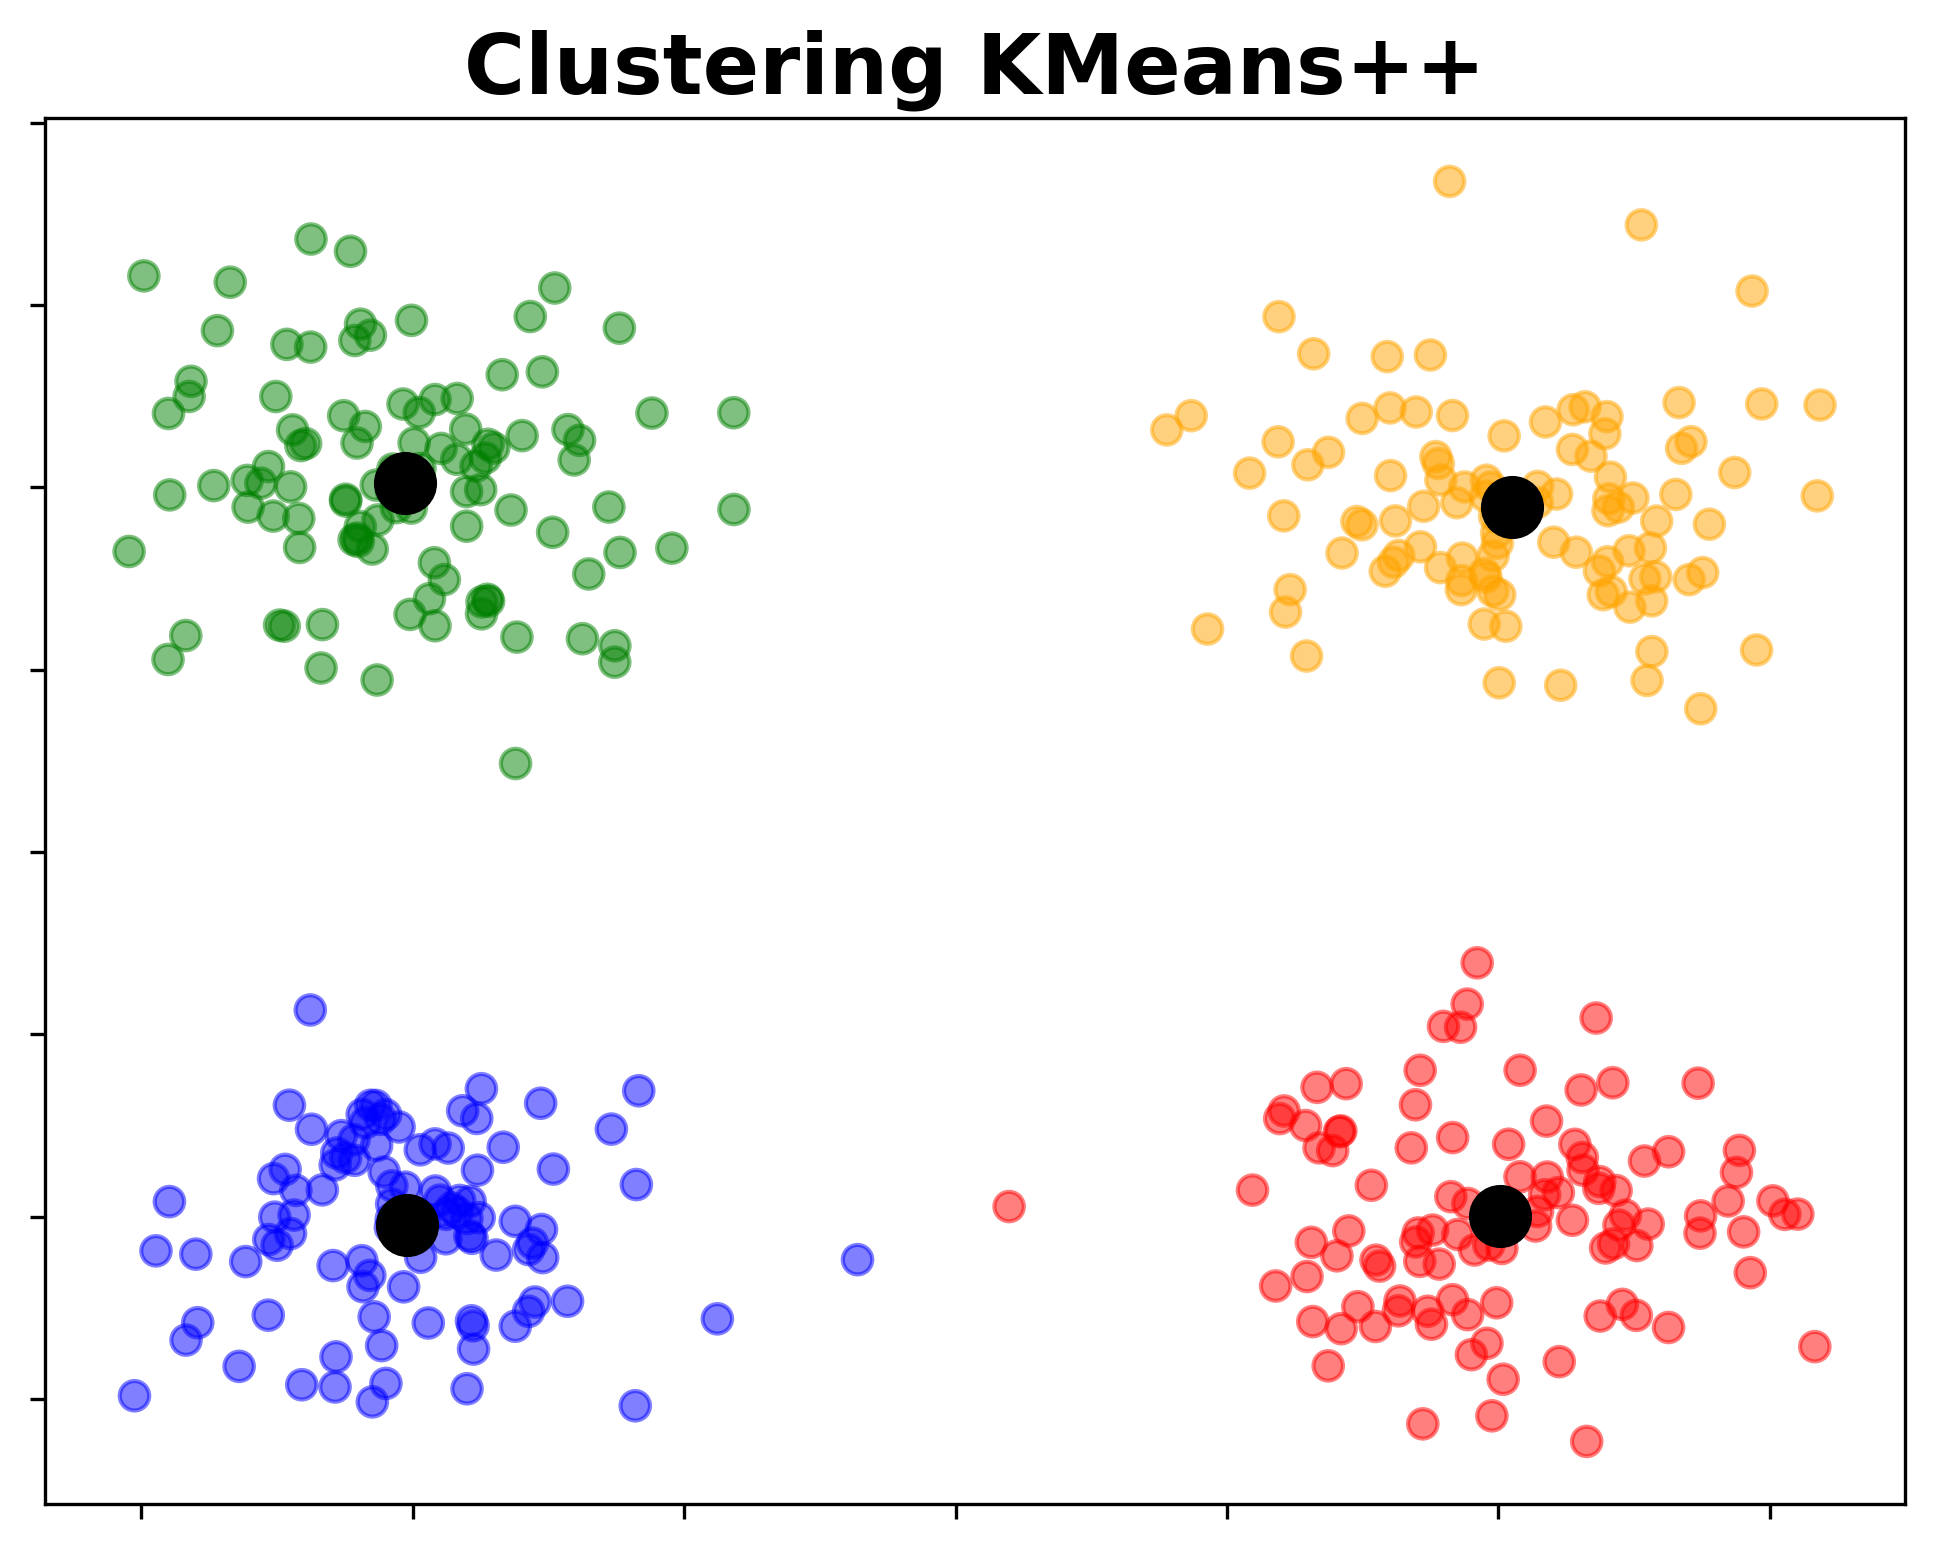

In [6]:
def kmeans(X, K, max_iters=100):
    centroids = kmeans_init(X, K)
    for i in range(max_iters):
        # affecter chaque point au centroïde le plus proche
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        cluster_ids = np.argmin(distances, axis=1)
        # mettre à jour les centroïdes pour qu'ils correspondent à la moyenne des points qui leur sont attribués
        for k in range(K):
            centroids[k] = np.mean(X[cluster_ids == k], axis=0)
    return cluster_ids, centroids

# exécuter l'algorithme k-means++
cluster_ids, centroids = kmeans(X, K=4)

colors = ['red', 'green', 'blue', 'orange']

# tracer les données avec une couleur différente par cluster final
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in cluster_ids], s=50, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200)
ax.set_title('Clustering KMeans++', fontsize = 20, fontweight="bold")
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()